# Privode result file name (users' actions needed)

### Change the file names accordingly if you run the MCMC again on your computer and get new result files

In [1]:
CNA_RCP45_file = 'results/Precomputed-CNA-RCP45-Full(only-a-few-number-of-variables-are-stored-to-reduce-file-size)'
CNA_RCP85_file = 'results/Precomputed-CNA-RCP85-Full(only-a-few-number-of-variables-are-stored-to-reduce-file-size)'
EAS_RCP45_file = 'results/Precomputed-EAS-RCP45-Full(only-a-few-number-of-variables-are-stored-to-reduce-file-size)'
EAS_RCP85_file = 'results/Precomputed-EAS-RCP85-Full(only-a-few-number-of-variables-are-stored-to-reduce-file-size)'

CNA_RCP45_SSB_file = 'results/Precomputed-CNA-RCP45-SSB(only-a-few-number-of-variables-are-stored-to-reduce-file-size)'
CNA_RCP85_SSB_file = 'results/Precomputed-CNA-RCP85-SSB(only-a-few-number-of-variables-are-stored-to-reduce-file-size)'
EAS_RCP45_SSB_file = 'results/Precomputed-EAS-RCP45-SSB(only-a-few-number-of-variables-are-stored-to-reduce-file-size)'
EAS_RCP85_SSB_file = 'results/Precomputed-EAS-RCP85-SSB(only-a-few-number-of-variables-are-stored-to-reduce-file-size)'

# Import modules

In [2]:
import numpy as np

import shelve
import dbm.dumb
import matplotlib.pyplot as plt
import seaborn as sns
monocolor = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)

# Load data

## Load model names

In [3]:
db = dbm.dumb.open('data/Model-Names')
my_shelf = shelve.Shelf(db)
model_names = my_shelf['model_names']
db.close()

## Load MCMC results

### Results from our model

In [4]:
db = dbm.dumb.open(CNA_RCP45_file)
my_shelf = shelve.Shelf(db)
V_CNA_RCP45=my_shelf['result_V_mean']
Y_CNA_RCP45 = my_shelf['result_YF']
db.close()
Y_CNA_RCP45.sort(axis=0)
spMean_CNA_RCP45 = np.mean(Y_CNA_RCP45,axis=1)
diag=np.sqrt(V_CNA_RCP45.diagonal())
corr_CNA_RCP45 = V_CNA_RCP45 / diag;
corr_CNA_RCP45 = corr_CNA_RCP45.transpose() / diag;

db = dbm.dumb.open(CNA_RCP85_file)
my_shelf = shelve.Shelf(db)
V_CNA_RCP85=my_shelf['result_V_mean']
Y_CNA_RCP85 = my_shelf['result_YF']
db.close()
Y_CNA_RCP85.sort(axis=0)
spMean_CNA_RCP85 = np.mean(Y_CNA_RCP85,axis=1)
diag=np.sqrt(V_CNA_RCP85.diagonal())
corr_CNA_RCP85 = V_CNA_RCP85 / diag;
corr_CNA_RCP85 = corr_CNA_RCP85.transpose() / diag;

db = dbm.dumb.open(EAS_RCP45_file)
my_shelf = shelve.Shelf(db)
V_EAS_RCP45=my_shelf['result_V_mean']
Y_EAS_RCP45 = my_shelf['result_YF']
db.close()
Y_EAS_RCP45.sort(axis=0)
spMean_EAS_RCP45 = np.mean(Y_EAS_RCP45,axis=1)
diag=np.sqrt(V_EAS_RCP45.diagonal())
corr_EAS_RCP45 = V_EAS_RCP45 / diag;
corr_EAS_RCP45 = corr_EAS_RCP45.transpose() / diag;

db = dbm.dumb.open(EAS_RCP85_file)
my_shelf = shelve.Shelf(db)
V_EAS_RCP85=my_shelf['result_V_mean']
Y_EAS_RCP85 = my_shelf['result_YF']
db.close()
Y_EAS_RCP85.sort(axis=0)
spMean_EAS_RCP85 = np.mean(Y_EAS_RCP85,axis=1)
diag=np.sqrt(V_EAS_RCP85.diagonal())
corr_EAS_RCP85 = V_EAS_RCP85 / diag;
corr_EAS_RCP85 = corr_EAS_RCP85.transpose() / diag;

### Results from the SSB model

In [5]:
db = dbm.dumb.open(CNA_RCP45_SSB_file)
my_shelf = shelve.Shelf(db)
Y_CNA_RCP45_SSB = my_shelf['result_YF']
db.close()
Y_CNA_RCP45_SSB.sort(axis=0)
spMean_CNA_RCP45_SSB = np.mean(Y_CNA_RCP45_SSB,axis=1)

db = dbm.dumb.open(CNA_RCP85_SSB_file)
my_shelf = shelve.Shelf(db)
Y_CNA_RCP85_SSB = my_shelf['result_YF']
db.close()
Y_CNA_RCP85_SSB.sort(axis=0)
spMean_CNA_RCP85_SSB = np.mean(Y_CNA_RCP85_SSB,axis=1)

db = dbm.dumb.open(EAS_RCP45_SSB_file)
my_shelf = shelve.Shelf(db)
Y_EAS_RCP45_SSB = my_shelf['result_YF']
db.close()
Y_EAS_RCP45_SSB.sort(axis=0)
spMean_EAS_RCP45_SSB = np.mean(Y_EAS_RCP45_SSB,axis=1)

db = dbm.dumb.open(EAS_RCP85_SSB_file)
my_shelf = shelve.Shelf(db)
Y_EAS_RCP85_SSB = my_shelf['result_YF']
db.close()
Y_EAS_RCP85_SSB.sort(axis=0)
spMean_EAS_RCP85_SSB = np.mean(Y_EAS_RCP85_SSB,axis=1)

## Load coordinates

In [6]:
db = dbm.dumb.open('data/Coordinates','r')
my_shelf = shelve.Shelf(db)

cna_lon = my_shelf['cna_lon']
cna_lat = my_shelf['cna_lat']
eas_lon = my_shelf['eas_lon']
eas_lat = my_shelf['eas_lat']
ma = my_shelf['ma']

my_shelf.close()

index = np.where(~ma.mask.flatten())

## Calculate Multi-Model Mean

In [7]:
MMM_CNA_RCP45 = np.zeros(64)
MMM_CNA_RCP85 = np.zeros(64)

MMM_EAS_RCP45 = np.zeros(216)
MMM_EAS_RCP85 = np.zeros(216)

db = dbm.dumb.open('data/CNA-RCP45')
CNA = shelve.Shelf(db)
for m in range(38):
    for r in range(CNA['RFm'][m]):
        MMM_CNA_RCP45 += CNA['XFmr'][m,r,]
MMM_CNA_RCP45 /= sum(CNA['RFm'])
MMM_CNA_RCP45 = MMM_CNA_RCP45.reshape(8,8)
db.close()

db = dbm.dumb.open('data/CNA-RCP85')
CNA = shelve.Shelf(db)
for m in range(38):
    for r in range(CNA['RFm'][m]):
        MMM_CNA_RCP85 += CNA['XFmr'][m,r,]
MMM_CNA_RCP85 /= sum(CNA['RFm'])
MMM_CNA_RCP85 = MMM_CNA_RCP85.reshape(8,8)
db.close()

db = dbm.dumb.open('data/EAS-RCP45')
EAS = shelve.Shelf(db)
for m in range(38):
    for r in range(EAS['RFm'][m]):
        MMM_EAS_RCP45[index] += EAS['XFmr'][m,r,]
MMM_EAS_RCP45 /= sum(EAS['RFm'])
MMM_EAS_RCP45 = MMM_EAS_RCP45.reshape(12,-1)
MMM_EAS_RCP45 = np.ma.masked_where(ma.mask,MMM_EAS_RCP45)
db.close()

db = dbm.dumb.open('data/EAS-RCP85')
EAS = shelve.Shelf(db)
for m in range(38):
    for r in range(EAS['RFm'][m]):
        MMM_EAS_RCP85[index] += EAS['XFmr'][m,r,]
MMM_EAS_RCP85 /= sum(EAS['RFm'])
MMM_EAS_RCP85 = MMM_EAS_RCP85.reshape(12,-1)
MMM_EAS_RCP85 = np.ma.masked_where(ma.mask,MMM_EAS_RCP85)
db.close()

## Calculate quantiles

In [8]:
quantile_CNA_RCP45 = MMM_CNA_RCP45.copy()
quantile_CNA_RCP85 = MMM_CNA_RCP85.copy()
quantile_EAS_RCP45 = MMM_EAS_RCP45.copy()
quantile_EAS_RCP85 = MMM_EAS_RCP85.copy()

for i in range(8):
    for j in range(8):
        quantile_CNA_RCP45[i,j] = np.argmin(MMM_CNA_RCP45[i,j] > Y_CNA_RCP45[:,i*8+j])/20000
        quantile_CNA_RCP85[i,j] = np.argmin(MMM_CNA_RCP85[i,j] > Y_CNA_RCP85[:,i*8+j])/20000

ct = 0;
for i in range(eas_lat.shape[0]):
    for j in range(eas_lon.shape[0]):
        if ma.mask[i,j]: continue
        quantile_EAS_RCP45[i,j] = np.argmin(MMM_EAS_RCP45[i,j] > Y_EAS_RCP45[:,ct])/20000
        quantile_EAS_RCP85[i,j] = np.argmin(MMM_EAS_RCP85[i,j] > Y_EAS_RCP85[:,ct])/20000
        ct += 1

In [9]:
quantile_CNA_RCP45_SSB = MMM_CNA_RCP45.copy()
quantile_CNA_RCP85_SSB = MMM_CNA_RCP85.copy()
quantile_EAS_RCP45_SSB = MMM_EAS_RCP45.copy()
quantile_EAS_RCP85_SSB = MMM_EAS_RCP85.copy()

for i in range(8):
    for j in range(8):
        quantile_CNA_RCP45_SSB[i,j] = np.argmin(MMM_CNA_RCP45[i,j] > Y_CNA_RCP45_SSB[:,i*8+j])/20000
        quantile_CNA_RCP85_SSB[i,j] = np.argmin(MMM_CNA_RCP85[i,j] > Y_CNA_RCP85_SSB[:,i*8+j])/20000

ct = 0;
for i in range(eas_lat.shape[0]):
    for j in range(eas_lon.shape[0]):
        if ma.mask[i,j]: continue
        quantile_EAS_RCP45_SSB[i,j] = np.argmin(MMM_EAS_RCP45[i,j] > Y_EAS_RCP45_SSB[:,ct])/20000
        quantile_EAS_RCP85_SSB[i,j] = np.argmin(MMM_EAS_RCP85[i,j] > Y_EAS_RCP85_SSB[:,ct])/20000
        ct += 1

# Show summary

## Draw quantiles

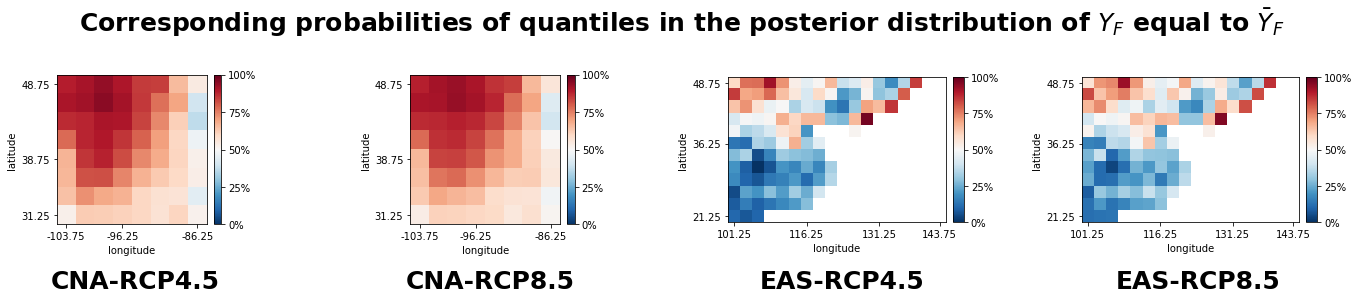

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, _ = plt.subplots(nrows=1,ncols=4,figsize=(20,4))
plt.subplots_adjust(top = 0.75,bottom = 0.23, left =0.05, right = 0.95, wspace=0.5,hspace = 0.5)

plt.subplot2grid((1,4),(0,0))
plt.imshow(quantile_CNA_RCP45,origin='lower',vmin = 0, vmax = 1, cmap = plt.cm.RdBu_r)
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax,ticks=[0,0.25,0.5,0.75,1])
cbar.ax.set_yticklabels(['0%','25%','50%','75%','100%'])

plt.subplot2grid((1,4),(0,1))
plt.imshow(quantile_CNA_RCP85,origin='lower',vmin = 0, vmax = 1, cmap = plt.cm.RdBu_r)
plt.xticks(np.array([0,3,7]),cna_lon[[0,3,7]])
plt.yticks(np.array([0,3,7]),cna_lat[[0,3,7]])
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax,ticks=[0,0.25,0.5,0.75,1])
cbar.ax.set_yticklabels(['0%','25%','50%','75%','100%'])


plt.subplot2grid((1,4),(0,2))
plt.imshow(quantile_EAS_RCP45,origin='lower',vmin = 0, vmax = 1, cmap = plt.cm.RdBu_r)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax,ticks=[0,0.25,0.5,0.75,1])
cbar.ax.set_yticklabels(['0%','25%','50%','75%','100%'])

plt.subplot2grid((1,4),(0,3))
plt.imshow(quantile_EAS_RCP85,origin='lower',vmin = 0, vmax = 1, cmap = plt.cm.RdBu_r)
plt.xticks(np.array([0,6,12,17]),eas_lon[[0,6,12,17]])
plt.yticks(np.array([0,6,11]),eas_lat[[0,6,11]])
plt.xlabel("longitude")
plt.ylabel("latitude")
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax,ticks=[0,0.25,0.5,0.75,1])
cbar.ax.set_yticklabels(['0%','25%','50%','75%','100%'])

fig.text(0.0705,0.01,'CNA-RCP4.5',fontsize=25,fontweight='bold')
fig.text(0.317,0.01,'CNA-RCP8.5',fontsize=25,fontweight='bold')
fig.text(0.563,0.01,'EAS-RCP4.5',fontsize=25,fontweight='bold')
fig.text(0.81,0.01,'EAS-RCP8.5',fontsize=25,fontweight='bold')

fig.text(0.09,0.9,r'Corresponding probabilities of quantiles in the posterior distribution of $Y_F$ equal to $\barY_F$',fontsize=25,fontweight='bold');

## Show the region mean results

In [11]:
highlight = lambda x: ' \x1b[1;31m'+x+'\x1b[0m '

print('1. Over the'+highlight("CNA")+'region under'+highlight('RCP45')+': Our predicted mean temperature for 2070-2100 is'\
      +highlight('{:.2f}'.format(np.mean(spMean_CNA_RCP45)-np.mean(MMM_CNA_RCP45)))\
      +'degrees higher than the model mean with a 90% credible interval'\
      +highlight('[{:.2f}, {:.2f}]'.format(spMean_CNA_RCP45[int(20000*0.05)],spMean_CNA_RCP45[int(20000*0.95)])))

print('2. Over the'+highlight("CNA")+'region under'+highlight('RCP85')+': Our predicted mean temperature for 2070-2100 is'\
      +highlight('{:.2f}'.format(np.mean(spMean_CNA_RCP85)-np.mean(MMM_CNA_RCP85)))\
      +'degrees higher than the model mean with a 90% credible interval'\
      +highlight('[{:.2f}, {:.2f}]'.format(spMean_CNA_RCP85[int(20000*0.05)],spMean_CNA_RCP85[int(20000*0.95)])))

print('3. Over the'+highlight("EAS")+'region under'+highlight('RCP45')+': Our predicted mean temperature for 2070-2100 is'\
      +highlight('{:.2f}'.format(np.mean(spMean_EAS_RCP45)-np.mean(MMM_EAS_RCP45)))\
      +'degrees higher than the model mean with a 90% credible interval'\
      +highlight('[{:.2f}, {:.2f}]'.format(spMean_EAS_RCP45[int(20000*0.05)],spMean_EAS_RCP45[int(20000*0.95)])))

print('4. Over the'+highlight("EAS")+'region under'+highlight('RCP85')+': Our predicted mean temperature for 2070-2100 is'\
      +highlight('{:.2f}'.format(np.mean(spMean_EAS_RCP85)-np.mean(MMM_EAS_RCP85)))\
      +'degrees higher than the model mean with a 90% credible interval'\
      +highlight('[{:.2f}, {:.2f}]'.format(spMean_EAS_RCP85[int(20000*0.05)],spMean_EAS_RCP85[int(20000*0.95)])))

print('')

print('5. Over the'+highlight("CNA")+'region under'+highlight('RCP45')+': The predicted mean temperature from the SSB model for 2070-2100 is'\
      +highlight('{:.2f}'.format(np.mean(spMean_CNA_RCP45_SSB)-np.mean(MMM_CNA_RCP45)))\
      +'degrees higher than the model mean with a 90% credible interval'\
      +highlight('[{:.2f}, {:.2f}]'.format(spMean_CNA_RCP45_SSB[int(20000*0.05)],spMean_CNA_RCP45_SSB[int(20000*0.95)])))

print('6. Over the'+highlight("CNA")+'region under'+highlight('RCP85')+': The predicted mean temperature from the SSB model for 2070-2100 is'\
      +highlight('{:.2f}'.format(np.mean(spMean_CNA_RCP85_SSB)-np.mean(MMM_CNA_RCP85)))\
      +'degrees higher than the model mean with a 90% credible interval'\
      +highlight('[{:.2f}, {:.2f}]'.format(spMean_CNA_RCP85_SSB[int(20000*0.05)],spMean_CNA_RCP85_SSB[int(20000*0.95)])))

print('7. Over the'+highlight("EAS")+'region under'+highlight('RCP45')+': The predicted mean temperature from the SSB model for 2070-2100 is'\
      +highlight('{:.2f}'.format(np.mean(spMean_EAS_RCP45_SSB)-np.mean(MMM_EAS_RCP45)))\
      +'degrees higher than the model mean with a 90% credible interval'\
      +highlight('[{:.2f}, {:.2f}]'.format(spMean_EAS_RCP45_SSB[int(20000*0.05)],spMean_EAS_RCP45_SSB[int(20000*0.95)])))

print('8. Over the'+highlight("EAS")+'region under'+highlight('RCP85')+': The predicted mean temperature from the SSB model for 2070-2100 is'\
      +highlight('{:.2f}'.format(np.mean(spMean_EAS_RCP85_SSB)-np.mean(MMM_EAS_RCP85)))\
      +'degrees higher than the model mean with a 90% credible interval'\
      +highlight('[{:.2f}, {:.2f}]'.format(spMean_EAS_RCP85_SSB[int(20000*0.05)],spMean_EAS_RCP85_SSB[int(20000*0.95)])))

1. Over the CNA region under RCP45 : Our predicted mean temperature for 2070-2100 is -0.71 degrees higher than the model mean with a 90% credible interval [285.02, 288.42] 
2. Over the CNA region under RCP85 : Our predicted mean temperature for 2070-2100 is -0.84 degrees higher than the model mean with a 90% credible interval [286.55, 290.77] 
3. Over the EAS region under RCP45 : Our predicted mean temperature for 2070-2100 is 0.49 degrees higher than the model mean with a 90% credible interval [281.06, 286.22] 
4. Over the EAS region under RCP85 : Our predicted mean temperature for 2070-2100 is 0.42 degrees higher than the model mean with a 90% credible interval [282.60, 288.75] 

5. Over the CNA region under RCP45 : The predicted mean temperature from the SSB model for 2070-2100 is -0.67 degrees higher than the model mean with a 90% credible interval [285.16, 288.21] 
6. Over the CNA region under RCP85 : The predicted mean temperature from the SSB model for 2070-2100 is -0.65 degrees

## Draw correlation estimates among all the climate models

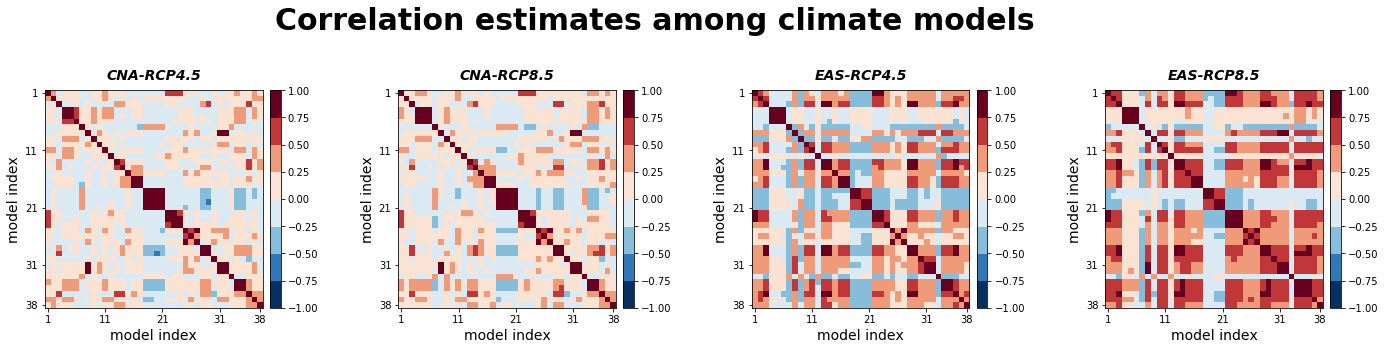

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, _ = plt.subplots(nrows=1,ncols=4,figsize=(20,5))
plt.subplots_adjust(top = 0.85,bottom = 0.05, left =0.05, right = 0.95, wspace=0.5)

plt.subplot(141)
plt.imshow(corr_CNA_RCP45,cmap=plt.cm.get_cmap('RdBu_r',8),vmin=-1,vmax=1)
plt.title('CNA-RCP4.5',fontsize=14,fontweight='bold',y=1.02,style='italic')
plt.xlabel("model index",fontsize=14)
plt.ylabel("model index",fontsize=14)
plt.xticks(np.array([1,11,21,31,38])-1,np.array([1,11,21,31,38]))
plt.yticks(np.array([1,11,21,31,38])-1,np.array([1,11,21,31,38]))
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax,ticks=np.linspace(-1,1,9))

plt.subplot(142)
plt.imshow(corr_CNA_RCP85,cmap=plt.cm.get_cmap('RdBu_r',8),vmin=-1,vmax=1)
plt.title('CNA-RCP8.5',fontsize=14,fontweight='bold',y=1.02,style='italic')
plt.xlabel("model index",fontsize=14)
plt.ylabel("model index",fontsize=14)
plt.xticks(np.array([1,11,21,31,38])-1,np.array([1,11,21,31,38]))
plt.yticks(np.array([1,11,21,31,38])-1,np.array([1,11,21,31,38]))
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax,ticks=np.linspace(-1,1,9))


plt.subplot(143)
plt.imshow(corr_EAS_RCP45,cmap=plt.cm.get_cmap('RdBu_r',8),vmin=-1,vmax=1)
plt.title('EAS-RCP4.5',fontsize=14,fontweight='bold',y=1.02,style='italic')
plt.xlabel("model index",fontsize=14)
plt.ylabel("model index",fontsize=14)
plt.xticks(np.array([1,11,21,31,38])-1,np.array([1,11,21,31,38]))
plt.yticks(np.array([1,11,21,31,38])-1,np.array([1,11,21,31,38]))
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax,ticks=np.linspace(-1,1,9))

plt.subplot(144)
plt.imshow(corr_EAS_RCP85,cmap=plt.cm.get_cmap('RdBu_r',8),vmin=-1,vmax=1)
plt.title('EAS-RCP8.5',fontsize=14,fontweight='bold',y=1.02,style='italic')
plt.xlabel("model index",fontsize=14)
plt.ylabel("model index",fontsize=14)
plt.xticks(np.array([1,11,21,31,38])-1,np.array([1,11,21,31,38]))
plt.yticks(np.array([1,11,21,31,38])-1,np.array([1,11,21,31,38]))
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(cax=cax,ticks=np.linspace(-1,1,9))

fig.text(0.21,0.92,'Correlation estimates among climate models',fontsize=30,fontweight='bold');

## Dump model pair name with correlation greater than 0.7

In [13]:
check = np.where(np.logical_and(np.logical_and(corr_CNA_RCP45>0.7 , corr_CNA_RCP85>0.7),\
                                np.logical_and(corr_EAS_RCP45>0.7,  corr_EAS_RCP85>0.7)))
for i in range(len(check[0])):
    if check[0][i] < check[1][i]:
        print("{}  ~  {} : {:.2f}, {:.2f}, {:.2f}, {:.2f}"\
            .format(model_names[check[0][i]],model_names[check[1][i]],\
            corr_CNA_RCP45[check[0][i],check[1][i]],\
            corr_CNA_RCP85[check[0][i],check[1][i]],\
            corr_EAS_RCP45[check[0][i],check[1][i]],\
            corr_EAS_RCP85[check[0][i],check[1][i]]))

CCSM4  ~  CESM1-BGC : 0.98, 0.98, 0.98, 0.98
CMCC-CMS  ~  MPI-ESM-LR : 0.79, 0.78, 0.74, 0.83
GFDL-ESM2G  ~  GFDL-ESM2M : 0.89, 0.88, 0.99, 0.99
GISS-E2-H  ~  GISS-E2-H-CC : 0.93, 0.93, 0.97, 0.97
GISS-E2-R  ~  GISS-E2-R-CC : 0.94, 0.96, 0.98, 0.98
HadGEM2-AO  ~  HadGEM2-CC : 0.76, 0.77, 0.92, 0.93
IPSL-CM5A-LR  ~  IPSL-CM5B-LR : 0.81, 0.79, 0.90, 0.94
MIROC-ESM  ~  MIROC-ESM-CHEM : 0.88, 0.94, 0.98, 0.99
MPI-ESM-LR  ~  MPI-ESM-MR : 0.94, 0.94, 0.93, 0.95
NorESM1-M  ~  NorESM1-ME : 0.95, 0.96, 0.98, 0.99
